# ニューラルネットワークの学習におけるテクニック

In [2]:
%matplotlib inline
import sys, os
sys.path.append("../deep-learning-from-scratch/")
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet

# パラメータの更新

# SGD(stochastic gradient descent)

In [3]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

# Momentum

In [4]:
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
                
        for ley in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
            params[key] += self.v[key]

# AdaGrad(Adaptive Gradient)

In [5]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, var in params.items():
                self.h[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + np.e**(-7))

# Adam(Adaptive Moment Estimation)

In [6]:
class Adam:
    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
                
        self.iter += 1
        lr_t = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)
        
        for key in params.key():
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta1) * (grads[key]**2 - self.v[key])
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + np.e**(-7))

# 過学習

In [9]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

#訓練データを減らし過学習を引き起こさせる
x_train = x_train[:300]
t_train = t_train[:300]

def over_fitting(weight_decay_lambda=0):
    #パラメータを増やして過学習を引き起こさせるために層を増やす
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay_lambda)
    optimizer = SGD(lr=0.01)

    max_epochs = 201
    train_size = x_train.shape[0]
    batch_size = 100

    train_loss_list = []
    train_acc_list = []
    test_acc_list = []

    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0

    for i in range(10000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]

        grads = network.gradient(x_batch, t_batch)
        optimizer.update(network.params, grads)

        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            test_acc = network.accuracy(x_test, t_test)
            train_acc_list.append(train_acc)
            test_acc_list.append(test_acc)

            #print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break

    #グラフを描く
    markers = {"train": 'o', "test": 's'}
    x = np.arange(max_epochs)
    plt.plot(x, train_acc_list, marker='o', label="train", markevery=10)
    plt.plot(x, test_acc_list, marker='s', label="test", markevery=10)
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.ylim(0, 1.0)
    plt.legend(loc="lower right")
    plt.show()

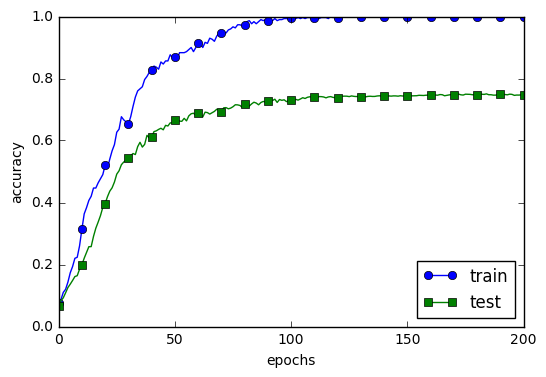

In [10]:
over_fitting(weight_decay_lambda=0)

# Weight decay

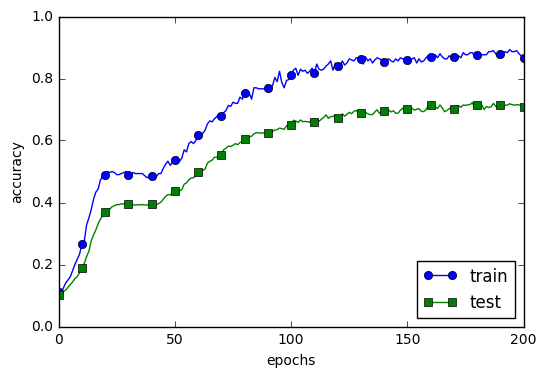

In [13]:
#Weight decay(重荷減衰)を0.1に設定
over_fitting(weight_decay_lambda=0.1)

# Dropout

train loss:2.29310437619
=== epoch:1, train acc:0.116666666667, test acc:0.1027 ===
train loss:2.27417194887
train loss:2.30462840334
train loss:2.30542109234
=== epoch:2, train acc:0.123333333333, test acc:0.1041 ===
train loss:2.3195643064
train loss:2.30019368197
train loss:2.30606756263
=== epoch:3, train acc:0.123333333333, test acc:0.1104 ===
train loss:2.32516126002
train loss:2.27689876989
train loss:2.30495130581
=== epoch:4, train acc:0.126666666667, test acc:0.1109 ===
train loss:2.27911394584
train loss:2.29362432211
train loss:2.27828373797
=== epoch:5, train acc:0.123333333333, test acc:0.1145 ===
train loss:2.31452217596
train loss:2.30328812557
train loss:2.27349619474
=== epoch:6, train acc:0.13, test acc:0.1195 ===
train loss:2.30986724798
train loss:2.2927107758
train loss:2.27242761131
=== epoch:7, train acc:0.126666666667, test acc:0.1217 ===
train loss:2.29443166117
train loss:2.30227668452
train loss:2.29929329629
=== epoch:8, train acc:0.133333333333, test acc:0

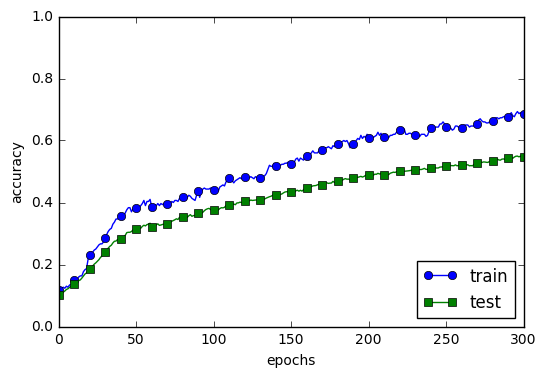

In [22]:
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

#学習データはweight decayの時と同じものを用いる

#Dropoutの設定
use_dropout = True
dropout_ratio = 0.2

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                             output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test, epochs=301, mini_batch_size=100, 
                            optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()
train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

#グラフを描く
markers = {"train": 'o', "test": 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label="train", markevery=10)
plt.plot(x, test_acc_list, marker='s', label="test", markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc="lower right")
plt.show()